In [1]:
import os

import pandas as pd
import numpy as ny

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
sns.set(context='notebook',style='darkgrid',palette='colorblind', font='sans-serif', font_scale=1, rc=None)

train=pd.read_csv('/Users/xuweiwei/Documents/kaggle/5_titanic/titanic/train.csv')
test=pd.read_csv('/Users/xuweiwei/Documents/kaggle/5_titanic/titanic/test.csv')

<div style="color:#00ADB5;
           display:fill;
           border-radius:5px;
           background-color:#393E46;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b> 2 ) Discovering the data:</b>
        </p>
</div>


In [2]:
print(train.shape)
print(test.shape)
print(train.columns)
print(test.columns)

(891, 12)
(418, 11)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.isnull().sum()/train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Missed values discovering results:
Train Data:
    Age: 177/891 missed values (19.8% are missed).
    Cabin: 687/891 missed values (77.1% are missed).
    Embarked: 2/891 missed values.
Test Data:
    Age: 86/418 missed values (20.5% are missed).
    Cabin: 327/418 missed values (78.2% are missed).
    Fare: 1/418 missed values.
Insights: Now we know what are the missed values, And we are going to discover the correlations to do what is appropriate.

#### Feature discovering results:
- Features of the test data are the same as features of the training data except for the Survived feature (because it's the target).
- Features types:
    - Categorical:
        - Pclass (ordinal)
        - Name (nominal)
        - Sex (nominal)
    - Numerical:
        - Age (continuous)
        - Fare (continuous)
        - SibSp (discrete)
        - Parch (discrete)
    - Mixed:
        - Ticket (numeric and alphanumeric)
        - Cabin (alphanumeric)
        
**Insights:** feature types are very important

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

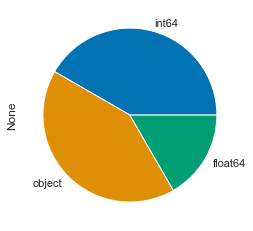

In [9]:
train.dtypes.value_counts().plot.pie()
test.isnull().sum()/test.shape[0]

In [10]:
train.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [3]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [26]:
# =============================
# Count of survived
# =============================
def count_result(res):
    f,ax=plt.subplots(1,2,figsize=(8,4))
    # train[res].replace({0:'died',1:'survived'}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    train[res].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    # ax[0].set_ylabel('')
    # sns.barplot(data=train,hue=train["Survived"],ax=ax[1])
    # sns.countplot(x = train["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
    sns.countplot(x=train[res],ax=ax[1])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')
    plt.show()
    

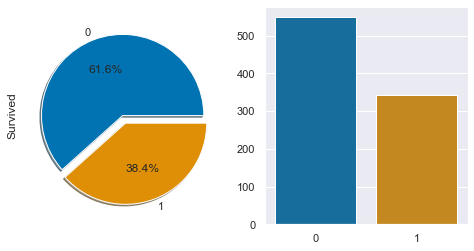

In [25]:
count_result('Survived')

<div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Discovering the features correlation with Survived:</b>
        </p>
</div>

In [28]:
#特征工程：通过可视化获取特征与结果之间的关联性
# helper function
def feature_find(feature):
    fig,axis=plt.subplots(1,2,figsize=(12,9))
    #条形图 barplot x是object类型特征值，y是结果值
    sns.barplot(data=train,x=feature,y='Survived',ax=axis[0]).set_title(f'{feature} VS Survived')
    #直方图，看不同特征对于结果的分布情况
    sns.histplot(data=train,x=feature,hue='Survived',ax=axis[1], multiple = 'stack').set_title(f'{feature} VS Survived')
    # 返回不同特征值对于结果影响的比例值
    res=train[[feature,'Survived']].groupby([feature],as_index=False).mean().sort_values(by='Survived', ascending=False)
    return res

,Sex,Survived
0,female,0.742038
1,male,0.188908


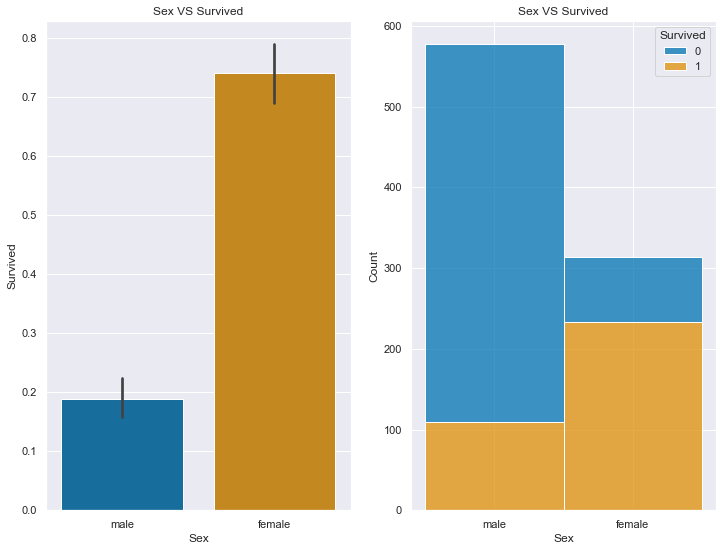

In [29]:
feature_find('Sex')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


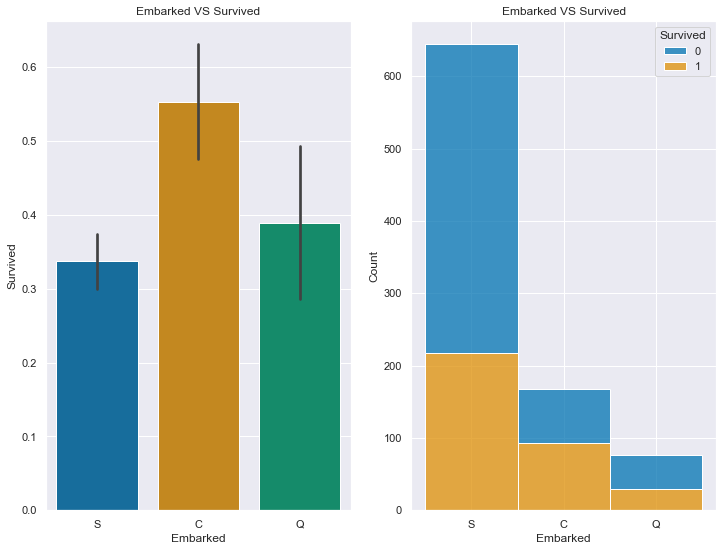

In [30]:
feature_find('Embarked')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


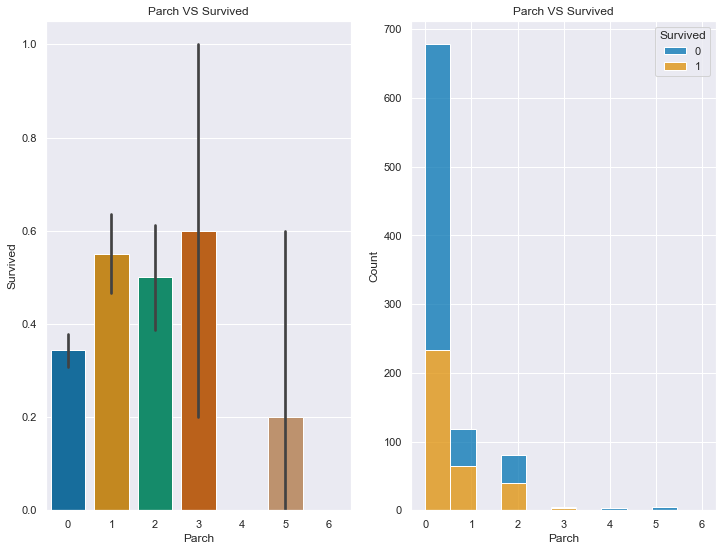

In [31]:
feature_find('Parch')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


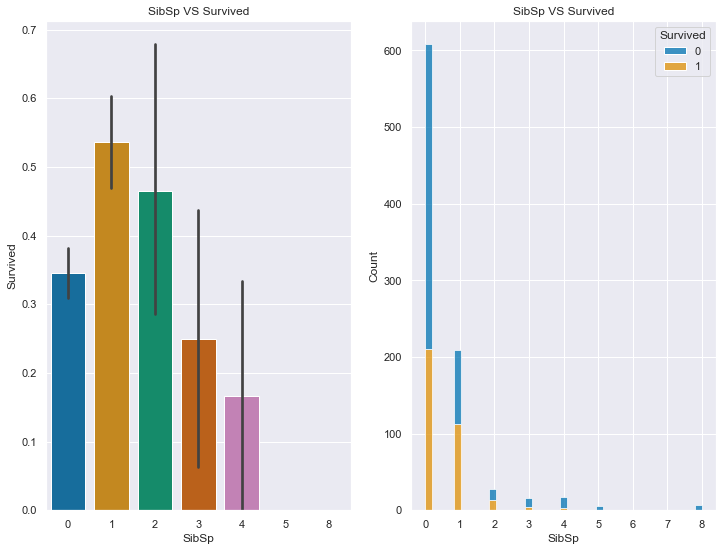

In [32]:
feature_find('SibSp')

<div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Discovering the correlation between the features:</b>
        </p>
</div>


<AxesSubplot:>

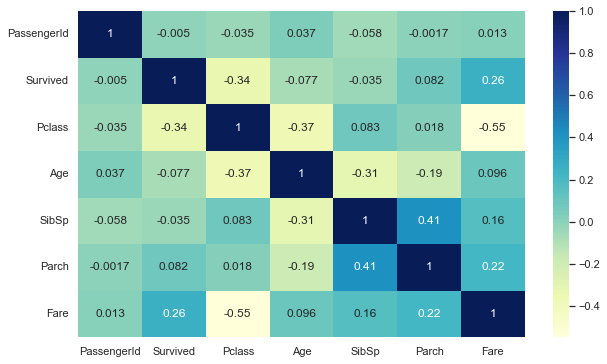

In [26]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

- Age negative correlation with Parch and Sibsp
- Pclass negative correlation with Age and Fare

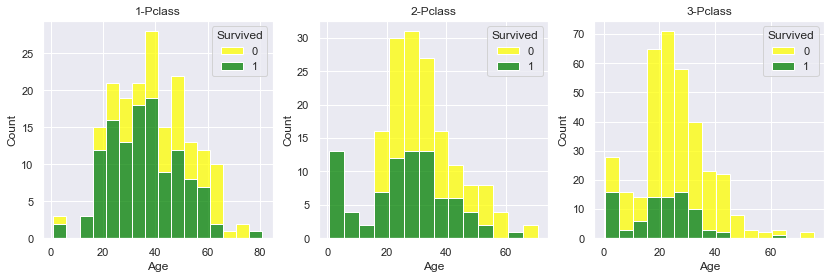

In [33]:
plot , ax = plt.subplots(1 , 3 , figsize=(14,4))
sns.histplot(data = train.loc[train["Pclass"]==1] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("1-Pclass")
sns.histplot(data = train.loc[train["Pclass"]==2] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("2-Pclass")
sns.histplot(data = train.loc[train["Pclass"]==3] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[2],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("3-Pclass")
plt.show()

- Pclass=3 had most passengers, Most if them did not survive.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived.
- Most passengers in Pclass=1 survived.

#### Sex - Age - Survived:

Text(0.5, 1.0, 'Females')

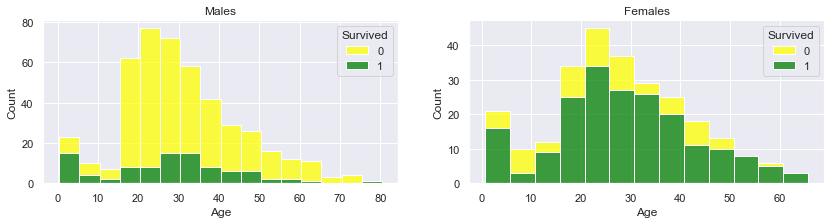

In [35]:
plot , ax = plt.subplots(1 , 2 , figsize=(14,3))
sns.histplot(data = train.loc[train["Sex"]=="male"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Males")
sns.histplot(data = train.loc[train["Sex"]=="female"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Females")

In [34]:
train.drop(columns = ["PassengerId"] , inplace = True)
combine = [train , test]
for dataset in combine:
    dataset.drop(columns = ["Ticket" , "Cabin"] , inplace = True)
    
print("Dropping features Done !!")

Dropping features Done !!


** Features discovering results:
Features of the test data are the same as features of the training data except for the Survived feature (because it's the target).
Features types:
    Categorical:
        Pclass (ordinal)
        Name (nominal)
        Sex (nominal)
    Numerical:
        Age (continuous)
        Fare (continuous)
        SibSp (discrete)
        Parch (discrete)
    Mixed:
        Ticket (numeric and alphanumeric)
        Cabin (alphanumeric)
Insights: Features types are very important for EDA step.

In [36]:
# Converting Categorical Features to Numerical and Filling Missed Values:
# 类别变量特征数字化，并且补充缺失的值
train.Embarked.fillna(train.Embarked.dropna().max(), inplace=True)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

In [37]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)    

In [40]:
import numpy as np
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [39]:
test.Fare.fillna(test.Fare.dropna().median() , inplace= True)

In [41]:
print(train.isnull().sum())
print("-" * 50)
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<div style="color:black;
           border-radius:0px;
           background-color:#00ADB5;
           font-size:14px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px;
              color:white;">
            <b>Creating Bands:</b>
        </p>
</div>

#### Age Band:

In [42]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [43]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,0,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,1,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,0,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,0,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,0,"(32.0, 48.0]"


In [44]:
train.drop(['AgeBand'], axis=1 , inplace = True)

In [45]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


In [46]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train.drop(['FareBand'], axis=1 , inplace = True)

In [47]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
test.drop(['Parch', 'SibSp'], axis=1 , inplace = True)    

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Create new feature of family size
for dataset in combine:
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
    
train.drop(columns = ["FamilySize"] , inplace = True)
test.drop(columns = ["FamilySize"] , inplace = True)


In [48]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.drop(['Name'], axis=1 , inplace = True)
test.drop(['Name'], axis=1 , inplace = True)    

<div style="color:#00ADB5;
           display:fill;
           border-radius:5px;
           background-color:#393E46;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b> 5 ) Modeling:</b>
        </p>
</div>
